In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-prediction-dataset/Traffic.csv
/kaggle/input/traffic-prediction-dataset/TrafficTwoMonth.csv


# 1| Import Libraries

In [3]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')


# 2| Read Dataset

In [4]:
# Load the dataset
data = pd.read_csv('/kaggle/input/traffic-prediction-dataset/Traffic.csv')

# Display the first few rows
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


# 3| Data Preprocessing

In [5]:
# Check
# Show shape of train and test sets data types and head of the dataset
print(data.dtypes)
print(data.head())

# Identify categorical columns (usually object or string type)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Apply Label Encoding to all categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Separate features and target
X = data.drop('Traffic Situation', axis=1)
y = data['Traffic Situation']

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object
          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  
Categorical Columns: ['Time', 'Day of the week', 'Traffic Sit

# 4| Data Visualization

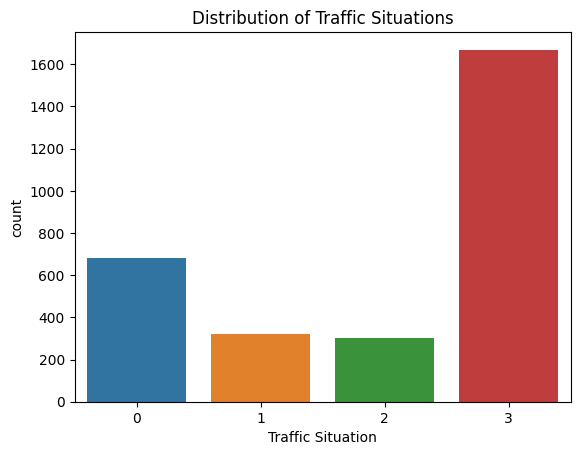

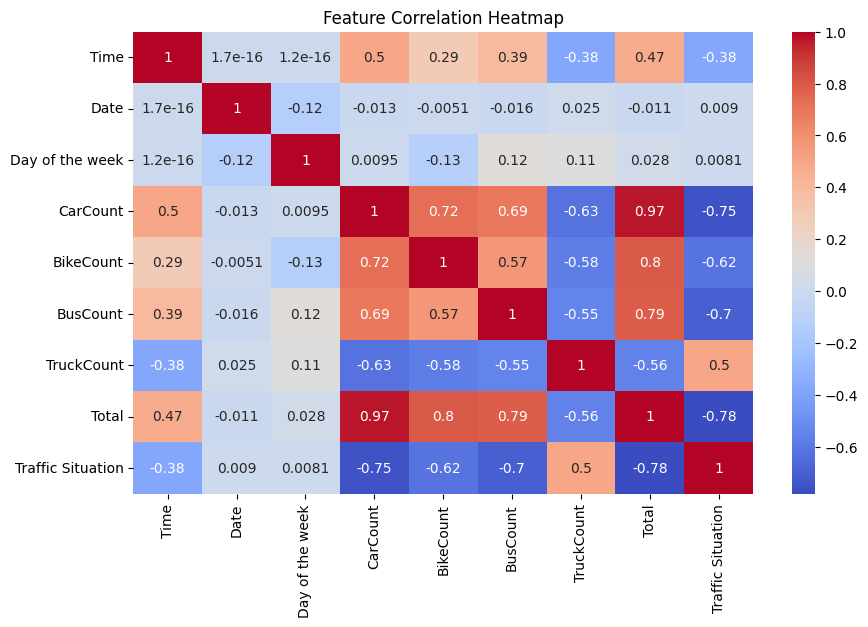

In [6]:
# Plot distribution of target variable
sns.countplot(x='Traffic Situation', data=data)
plt.title('Distribution of Traffic Situations')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# 5| Train the Model with XGBoost

In [7]:
# Initial Model (Basic)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

# 6| Split the Data (80% Train, 20% Test)


In [8]:
from sklearn.model_selection import train_test_split

# Perform 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the splits
print("Training Set:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("\nTesting Set:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Training Set:
X_train shape: (2380, 8)
y_train shape: (2380,)

Testing Set:
X_test shape: (596, 8)
y_test shape: (596,)


# 7|  Train, Evaluate, and Visualize the Model

I0000 00:00:1745212248.747633      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745212248.748346      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/100


I0000 00:00:1745212251.197304      98 service.cc:148] XLA service 0x7f518c002770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745212251.197771      98 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745212251.197791      98 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745212251.374415      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


121/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5787 - loss: 1.3121

I0000 00:00:1745212252.236446      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6007 - loss: 1.2965 - val_accuracy: 0.7718 - val_loss: 1.0714
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7638 - loss: 1.0104 - val_accuracy: 0.7768 - val_loss: 0.8352
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7735 - loss: 0.8023 - val_accuracy: 0.7970 - val_loss: 0.7035
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.6770 - val_accuracy: 0.8121 - val_loss: 0.6083
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8092 - loss: 0.5920 - val_accuracy: 0.8238 - val_loss: 0.5430
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8390 - loss: 0.5132 - val_accuracy: 0.8221 - val_loss: 0.4918
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8386 - loss: 0.4789 - val_accuracy: 0.8591 - val_loss: 0.4556
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8886 - loss: 0.4155 - val_accuracy: 0.896

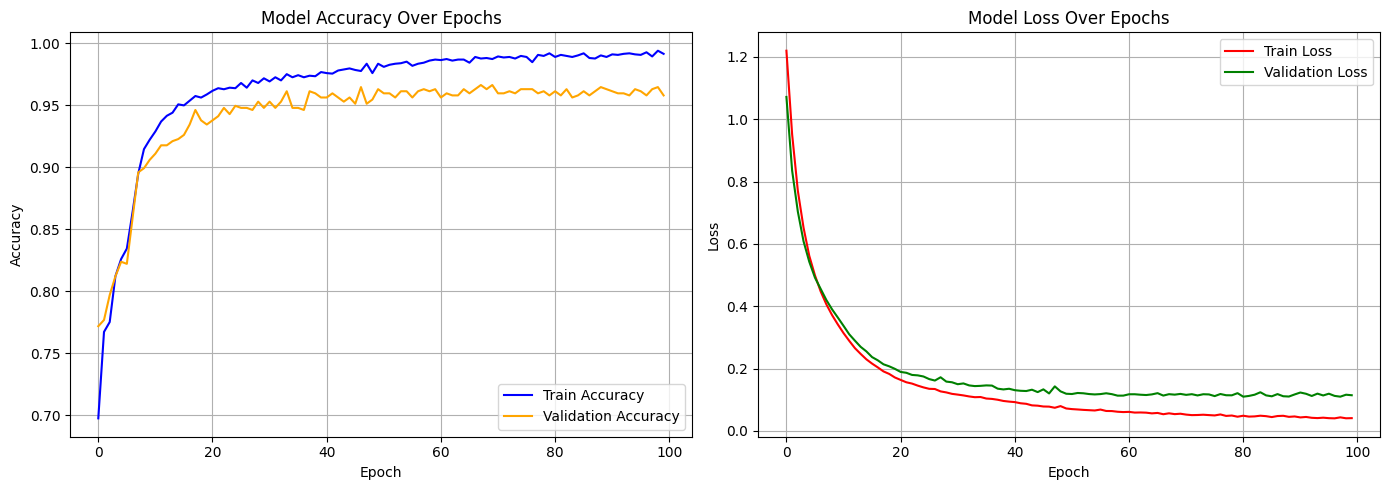

In [9]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# --- Build the model ---
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Hidden Layer 1
model.add(Dense(32, activation='softmax'))                              # Hidden Layer 2
model.add(Dense(len(np.unique(y_train)), activation='softmax'))         # Output Layer

# --- Compile the model ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Train the model ---
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=16,
                    verbose=1,
                    validation_data=(X_test, y_test))

# --- Predict on test data ---
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# --- Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# --- Print Results ---
print("\n📊 Model Evaluation (Batch Size = 16, Activation = softmax, Epochs = 100):")
print(f"✅ Accuracy : {accuracy:.4f}")
print(f"📌 Precision: {precision:.4f}")
print(f"📌 Recall   : {recall:.4f}")
print(f"🏅 F1 Score : {f1:.4f}")

# --- Visualization ---
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
